In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from tqdm import tqdm

from spatgame import evolve, make_rgb
from meangame import MeanGamePy as MeanGame

In [2]:
plt.style.use("seaborn-whitegrid")
plt.rcParams["axes.grid"] = False

## One defector

<IPython.core.display.Javascript object>


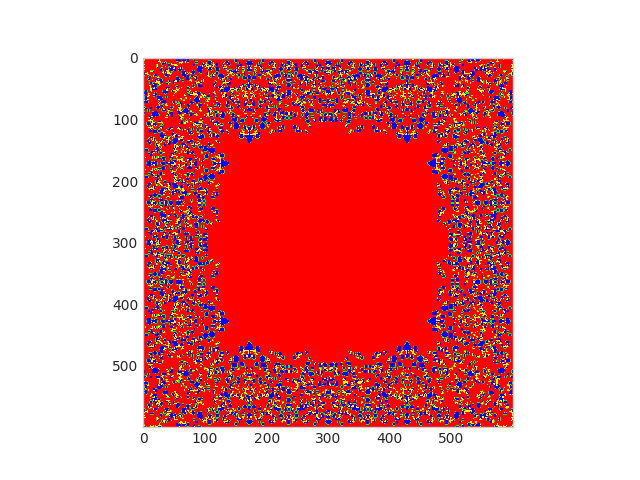

In [3]:
L = 600
p_c_ = .5
b = 1.59
# np.random.seed(45)
# field = np.random.choice((0, 1), (L, L), p=(1-p_c_, p_c_))
field = np.ones((L, L), dtype=int)
# field[30:32, 30:32] = np.zeros((2, 2), dtype=int)
field[L//2, L//2] = 0

# time_text = plt.text(2, 6, "0")
# draw the initial field
fig = plt.figure()
im = plt.imshow(make_rgb(field), animated=True, cmap=plt.get_cmap('Paired'))
# ax.grid(False)

# updater function
def updatefig(frame):
    if frame < 3:
        return im,
    global field
    field_ = evolve(field, b, 1)
    coll = make_rgb(field_ + 2*(field_-field))
    field = field_.copy()
    im.set_array(coll)
    return im,

# animate!
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=150, blit=True)

plt.show()

## Evolution in the top sector of the game with one defector

In [ ]:
L = 200
p_c_ = .5
b = 1.59
# np.random.seed(45)
# field = np.random.choice((0, 1), (L, L), p=(1-p_c_, p_c_))
field = np.ones((L, L), dtype=int)
# field[30:32, 30:32] = np.zeros((2, 2), dtype=int)
field[L//2, L//2] = 0

# time_text = plt.text(2, 6, "0")
# draw the initial field
fig = plt.figure()
im = plt.imshow(make_rgb(field)[:L//2, L//4:3*L//4], animated=True, cmap=plt.get_cmap('Paired'))
# ax.grid(False)

# updater function
def updatefig(frame):
    if frame < 3:
        return im,
    global field
    field_ = evolve(field, b, 1)
    coll = make_rgb(field_ + 2*(field_-field))
    field = field_.copy()
    im.set_array(coll[:L//2, L//4:3*L//4])
    return im,

# animate!
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=150, blit=True)

plt.show()

## Random field

<IPython.core.display.Javascript object>


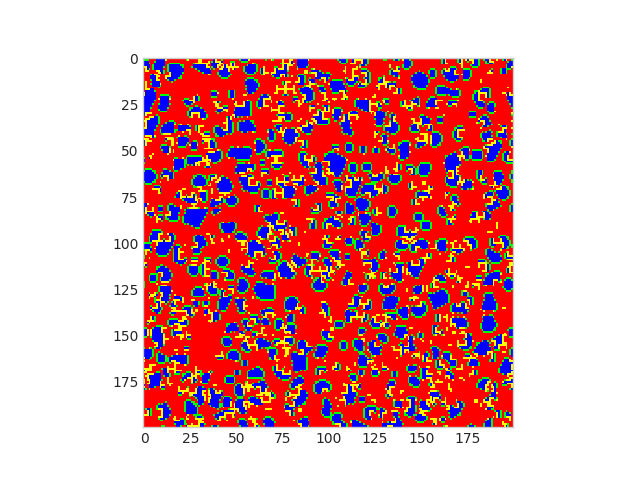

In [27]:
L = 200
p_c_ = .5
b = 1.59
# np.random.seed(45)
field = np.random.choice((0, 1), (L, L), p=(1-p_c_, p_c_))

# draw the initial field
fig = plt.figure()
im = plt.imshow(make_rgb(field), animated=True, cmap=plt.get_cmap('Paired'))
# ax.grid(False)

# updater function
def updatefig(frame):
    if frame < 3:
        return im,
    global field
    field_ = evolve(field, b, 1)
    coll = make_rgb(field_ + 2*(field_-field))
    field = field_.copy()
    im.set_array(coll)
    return im,

# animate!
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=150, blit=True)

plt.show()

In [18]:
field.sum()/L/L

0.02775

In [10]:
field.sum()/200./200.

0.30105